In [49]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [29]:
file_paths = [
    'Dataset/Clean_output/Aster-1_cleanresample_lith.csv',
    'Dataset/Clean_output/Aster-2_cleanresample_lith.csv',
    'Dataset/Clean_output/Aster-3_cleanresample_lith.csv',
    'Dataset/Clean_output/Aster-4_cleanresample_lith.csv',
    'Dataset/Clean_output/Aster-4A_cleanresample_lith.csv',
    'Dataset/Clean_output/Aster-5_cleanresample_lith.csv'
]

list_of_dfs = []

for file in file_paths:
    try:
        df = pd.read_csv(file)
        dataset_name = os.path.basename(file).split('_')[0] 
        # Tambahkan kolom baru 'Dataset_Name'
        df['Dataset_Name'] = dataset_name
        
        list_of_dfs.append(df)
        print(f"Berhasil membaca: {file} dan menambahkan kolom 'Dataset_Name' dengan nilai: {dataset_name}")
    except FileNotFoundError:
        print(f"Error: File tidak ditemukan di {file}. Mohon periksa jalur file atau unggah file.")
    except Exception as e:
        print(f"Terjadi kesalahan saat membaca {file}: {e}")
        
if list_of_dfs: # Pastikan list tidak kosong sebelum melakukan concat
    combined_df = pd.concat(list_of_dfs, ignore_index=True)

    print("\nDataFrame gabungan (head):")
    print(combined_df.head())
    print(f"\nJumlah baris total di DataFrame gabungan: {len(combined_df)}")
else:
    print("\nTidak ada DataFrame yang berhasil dibaca. Pastikan file-file CSV ada di lokasi yang benar.")

list_of_dfs

Berhasil membaca: Dataset/Clean_output/Aster-1_cleanresample_lith.csv dan menambahkan kolom 'Dataset_Name' dengan nilai: Aster-1
Berhasil membaca: Dataset/Clean_output/Aster-2_cleanresample_lith.csv dan menambahkan kolom 'Dataset_Name' dengan nilai: Aster-2
Berhasil membaca: Dataset/Clean_output/Aster-3_cleanresample_lith.csv dan menambahkan kolom 'Dataset_Name' dengan nilai: Aster-3
Berhasil membaca: Dataset/Clean_output/Aster-4_cleanresample_lith.csv dan menambahkan kolom 'Dataset_Name' dengan nilai: Aster-4
Berhasil membaca: Dataset/Clean_output/Aster-4A_cleanresample_lith.csv dan menambahkan kolom 'Dataset_Name' dengan nilai: Aster-4A
Berhasil membaca: Dataset/Clean_output/Aster-5_cleanresample_lith.csv dan menambahkan kolom 'Dataset_Name' dengan nilai: Aster-5

DataFrame gabungan (head):
      TWT           MD      Gamma  General_Discrete Dataset_Name
0  2665.0  2220.620333  97.140000                 1      Aster-1
1  2665.5  2221.077667  96.546667                 1      Aster-1
2

[         TWT           MD      Gamma  General_Discrete Dataset_Name
 0     2665.0  2220.620333  97.140000                 1      Aster-1
 1     2665.5  2221.077667  96.546667                 1      Aster-1
 2     2666.0  2221.534667  98.646667                 1      Aster-1
 3     2666.5  2221.992000  96.093333                 1      Aster-1
 4     2667.0  2222.449333  96.800000                 1      Aster-1
 ...      ...          ...        ...               ...          ...
 2660  3995.0  3419.551333  91.096667                 1      Aster-1
 2661  3995.5  3420.008333  91.250000                 1      Aster-1
 2662  3996.0  3420.465667  88.340000                 1      Aster-1
 2663  3996.5  3420.922667  87.053333                 1      Aster-1
 2664  3997.0  3421.380000  88.896667                 1      Aster-1
 
 [2665 rows x 5 columns],
          TWT           MD       Gamma  General_Discrete Dataset_Name
 0     2665.0  2266.340333  103.810000                 1      Aster-2
 1  

In [27]:
file_paths = [
    'Dataset/Clean_well/Aster-1_interp.csv',
    'Dataset/Clean_well/Aster-2_interp.csv',
    'Dataset/Clean_well/Aster-3_interp.csv',
    'Dataset/Clean_well/Aster-4_interp.csv',
    'Dataset/Clean_well/Aster-4A_interp.csv',
    'Dataset/Clean_well/Aster-5_interp.csv'
]

list_of_dfs_interp = []

for file in file_paths:
    try:
        df = pd.read_csv(file)
        df = df.rename(columns={'twt': 'TWT'})
        dataset_name = os.path.basename(file).split('_')[0] 
        # Tambahkan kolom baru 'Dataset_Name'
        #dataset_name = dataset_name.rename(columns={'twt': 'TWT'})
        df['Dataset_Name'] = dataset_name
        
        list_of_dfs_interp.append(df)
        print(f"Berhasil membaca: {file} dan menambahkan kolom 'Dataset_Name' dengan nilai: {dataset_name}")
    except FileNotFoundError:
        print(f"Error: File tidak ditemukan di {file}. Mohon periksa jalur file atau unggah file.")
    except Exception as e:
        print(f"Terjadi kesalahan saat membaca {file}: {e}")
        
if list_of_dfs_interp: # Pastikan list tidak kosong sebelum melakukan concat

    combined_df = pd.concat(list_of_dfs_interp, ignore_index=True)

    print("\nDataFrame gabungan (head):")
    print(combined_df.head())
    print(f"\nJumlah baris total di DataFrame gabungan: {len(combined_df)}")
else:
    print("\nTidak ada DataFrame yang berhasil dibaca. Pastikan file-file CSV ada di lokasi yang benar.")
    
list_of_dfs_interp

Berhasil membaca: Dataset/Clean_well/Aster-1_interp.csv dan menambahkan kolom 'Dataset_Name' dengan nilai: Aster-1
Berhasil membaca: Dataset/Clean_well/Aster-2_interp.csv dan menambahkan kolom 'Dataset_Name' dengan nilai: Aster-2
Berhasil membaca: Dataset/Clean_well/Aster-3_interp.csv dan menambahkan kolom 'Dataset_Name' dengan nilai: Aster-3
Berhasil membaca: Dataset/Clean_well/Aster-4_interp.csv dan menambahkan kolom 'Dataset_Name' dengan nilai: Aster-4
Berhasil membaca: Dataset/Clean_well/Aster-4A_interp.csv dan menambahkan kolom 'Dataset_Name' dengan nilai: Aster-4A
Berhasil membaca: Dataset/Clean_well/Aster-5_interp.csv dan menambahkan kolom 'Dataset_Name' dengan nilai: Aster-5

DataFrame gabungan (head):
     TWT  iline  xline   Seismic      cdp_x      cdp_y     Chaos  \
0  500.0   3102   8783 -2.872159  657868.94  368080.75  0.103053   
1  500.5   3102   8783 -2.878669  657868.94  368080.75  0.103095   
2  501.0   3102   8783 -2.885179  657868.94  368080.75  0.103137   
3  501.5

[         TWT  iline  xline      Seismic      cdp_x      cdp_y     Chaos  \
 0      500.0   3102   8783    -2.872159  657868.94  368080.75  0.103053   
 1      500.5   3102   8783    -2.878669  657868.94  368080.75  0.103095   
 2      501.0   3102   8783    -2.885179  657868.94  368080.75  0.103137   
 3      501.5   3102   8783    -2.891689  657868.94  368080.75  0.103178   
 4      502.0   3102   8783    -2.898199  657868.94  368080.75  0.103220   
 ...      ...    ...    ...          ...        ...        ...       ...   
 6997  3998.5   3102   8783 -1751.220687  657868.94  368080.75  0.256995   
 6998  3999.0   3102   8783 -1755.462625  657868.94  368080.75  0.285114   
 6999  3999.5   3102   8783 -1759.704563  657868.94  368080.75  0.313232   
 7000  4000.0   3102   8783 -1763.946500  657868.94  368080.75  0.341351   
 7001  4000.5   3102   8783 -1763.946500  657868.94  368080.75  0.341351   
 
       Dominant_Frequency  Gradient_Mag  Instantaneous_Bandwith  \
 0               0.

In [37]:
merged_dfs_by_dataset = []

# Iterasi melalui setiap DataFrame di list_of_dfs_interp
for df_interp in list_of_dfs_interp:
    dataset_name = df_interp['Dataset_Name'].iloc[0] # Ambil nama dataset dari DataFrame interp
    
    # Cari DataFrame yang sesuai di list_of_dfs_output berdasarkan Dataset_Name
    df_output_match = None
    for df_output in list_of_dfs:
        if df_output['Dataset_Name'].iloc[0] == dataset_name:
            df_output_match = df_output
            break
            
    if df_output_match is not None:
        # Gabungkan kedua DataFrame berdasarkan 'TWT' dan 'Dataset_Name'
        # Gunakan 'outer' join untuk memastikan semua baris dari kedua DataFrame dipertahankan
        # Jika ada kolom yang sama selain 'TWT' dan 'Dataset_Name', Pandas akan menambahkan suffix
        merged_df = pd.merge(df_output_match,df_interp, on=['TWT', 'Dataset_Name'], how='inner')
        merged_dfs_by_dataset.append(merged_df)
        print(f"\nBerhasil menggabungkan DataFrame untuk Dataset: {dataset_name} berdasarkan 'TWT'.")
        print(f"Head DataFrame gabungan untuk {dataset_name}:\n{merged_df.head()}")
    else:
        print(f"\nTidak ditemukan DataFrame yang cocok di 'Clean_output' untuk Dataset: {dataset_name}. Tidak digabungkan.")

# Sekarang Anda memiliki 'merged_dfs_by_dataset' yang berisi daftar DataFrame yang telah digabungkan
# Setiap elemen dalam list ini adalah DataFrame gabungan untuk satu dataset (misal: Aster-1, Aster-2, dst.)
print("\n--- Ringkasan DataFrame yang telah digabungkan per Dataset ---")
for i, df in enumerate(merged_dfs_by_dataset):
    print(f"DataFrame gabungan {i+1} (Dataset: {df['Dataset_Name'].iloc[0]}): {len(df)} baris, {len(df.columns)} kolom")


Berhasil menggabungkan DataFrame untuk Dataset: Aster-1 berdasarkan 'TWT'.
Head DataFrame gabungan untuk Aster-1:
      TWT           MD      Gamma  General_Discrete Dataset_Name  iline  \
0  2665.0  2220.620333  97.140000                 1      Aster-1   3102   
1  2665.5  2221.077667  96.546667                 1      Aster-1   3102   
2  2666.0  2221.534667  98.646667                 1      Aster-1   3102   
3  2666.5  2221.992000  96.093333                 1      Aster-1   3102   
4  2667.0  2222.449333  96.800000                 1      Aster-1   3102   

   xline    Seismic      cdp_x      cdp_y     Chaos  Dominant_Frequency  \
0   8783 -186.28076  657868.94  368080.75  0.069932           18.267109   
1   8783  -98.96887  657868.94  368080.75  0.069873           18.214709   
2   8783  -11.65698  657868.94  368080.75  0.069813           18.162309   
3   8783   75.65491  657868.94  368080.75  0.069753           18.109910   
4   8783  162.96680  657868.94  368080.75  0.069694        

In [38]:
# Anda juga bisa membuat fungsi untuk mempermudah pemanggilan
def get_merged_df_by_name(dataset_name, merged_list):
    for df in merged_list:
        if df['Dataset_Name'].iloc[0] == dataset_name:
            return df
    return None

# Contoh penggunaan fungsi
df_aster_3 = get_merged_df_by_name('Aster-2', merged_dfs_by_dataset)

df_aster_3

,TWT,MD,Gamma,General_Discrete,Dataset_Name,iline,xline,Seismic,cdp_x,cdp_y,Chaos,Dominant_Frequency,Gradient_Mag,Instantaneous_Bandwith,Instantaneous_Freq,Instantaneous_Quality,RMS,Sweetness,Envelope
0,2665.0,2266.340333,103.810000,1,Aster-2,2960,8622,-976.467770,653923.1,367037.5,0.106704,21.354591,272.664648,1.352009,21.301663,9.391594,565.823070,226.937445,1047.056950
1,2665.5,2266.797667,104.543333,1,Aster-2,2960,8622,-983.915280,653923.1,367037.5,0.107372,21.523144,260.822351,1.554214,21.454438,8.548104,566.557725,225.598183,1044.517875
2,2666.0,2267.254667,104.456667,1,Aster-2,2960,8622,-991.362790,653923.1,367037.5,0.108039,21.691698,248.980055,1.756418,21.607213,7.704614,567.292380,224.258920,1041.978800
3,2666.5,2267.712000,102.250000,1,Aster-2,2960,8622,-998.810300,653923.1,367037.5,0.108707,21.860251,237.137759,1.958623,21.759988,6.861125,568.027035,222.919657,1039.439725
4,2667.0,2268.169333,100.646667,1,Aster-2,2960,8622,-1006.257810,653923.1,367037.5,0.109374,22.028804,225.295463,2.160828,21.912763,6.017635,568.761690,221.580395,1036.900650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1571,3450.5,2976.372000,83.983333,1,Aster-2,2960,8622,-860.085901,653923.1,367037.5,0.109419,11.658345,398.732406,5.854278,10.061473,0.871936,1119.209887,401.829450,1274.890388
1572,3451.0,2976.829333,85.826667,1,Aster-2,2960,8622,-905.551568,653923.1,367037.5,0.107501,11.580088,399.318947,5.672041,10.079554,0.898942,1140.583025,408.891550,1298.397125
1573,3451.5,2977.286333,89.146667,1,Aster-2,2960,8622,-951.017234,653923.1,367037.5,0.105584,11.501830,399.905489,5.489804,10.097636,0.925947,1161.956162,415.953650,1321.903862
1574,3452.0,2977.743667,89.850000,1,Aster-2,2960,8622,-996.482900,653923.1,367037.5,0.103666,11.423573,400.492030,5.307568,10.115717,0.952952,1183.329300,423.015750,1345.410600


In [39]:
if merged_dfs_by_dataset:
    # Menggabungkan semua DataFrame dalam list menjadi satu DataFrame besar
    final_combined_df = pd.concat(merged_dfs_by_dataset, ignore_index=True)

    print("\n--- DataFrame Gabungan Akhir dari Semua Dataset ---")
    print("Head DataFrame gabungan akhir:")
    print(final_combined_df.head())
    print(f"\nJumlah baris total di DataFrame gabungan akhir: {len(final_combined_df)}")
    print(f"Jumlah kolom di DataFrame gabungan akhir: {len(final_combined_df.columns)}")
    print("\nInformasi DataFrame gabungan akhir:")
    final_combined_df.info()
else:
    print("\nTidak ada DataFrame di 'merged_dfs_by_dataset' untuk digabungkan. Pastikan langkah penggabungan per dataset sudah berhasil.")



--- DataFrame Gabungan Akhir dari Semua Dataset ---
Head DataFrame gabungan akhir:
      TWT           MD      Gamma  General_Discrete Dataset_Name  iline  \
0  2665.0  2220.620333  97.140000                 1      Aster-1   3102   
1  2665.5  2221.077667  96.546667                 1      Aster-1   3102   
2  2666.0  2221.534667  98.646667                 1      Aster-1   3102   
3  2666.5  2221.992000  96.093333                 1      Aster-1   3102   
4  2667.0  2222.449333  96.800000                 1      Aster-1   3102   

   xline    Seismic      cdp_x      cdp_y     Chaos  Dominant_Frequency  \
0   8783 -186.28076  657868.94  368080.75  0.069932           18.267109   
1   8783  -98.96887  657868.94  368080.75  0.069873           18.214709   
2   8783  -11.65698  657868.94  368080.75  0.069813           18.162309   
3   8783   75.65491  657868.94  368080.75  0.069753           18.109910   
4   8783  162.96680  657868.94  368080.75  0.069694           18.057510   

   Gradient_Ma

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import os

# 1. Load the data
try:
    # Memuat file CSV yang sudah digabungkan (All_data.csv)
    # Pastikan file All_data.csv sudah diunggah atau berada di direktori yang sama
    df = pd.read_csv('All_data.csv')
    print("Successfully loaded All_data.csv")
    print("DataFrame head:")
    print(df.head())
    print("\nDataFrame columns:")
    print(df.columns)
except FileNotFoundError:
    print("Error: All_data.csv not found. Please ensure the file is uploaded or in the correct directory.")
    exit() # Keluar jika file tidak ditemukan

# 2. Define features and target
target_column = 'General_Discrete'
# Kolom yang akan dikecualikan dari fitur berdasarkan permintaan pengguna
exclude_columns = ['cdp_x', 'cdp_y', 'md', 'xline', 'iline']

# Periksa apakah 'TWT' ada, jika ya, tambahkan ke daftar pengecualian fitur
if 'TWT' in df.columns:
    exclude_columns.append('TWT')

# Periksa apakah kolom 'Dataset_Name' sudah ada
has_dataset_name = 'Dataset_Name' in df.columns

# Tentukan kolom fitur yang akan digunakan
feature_columns = [col for col in df.columns if col not in exclude_columns and col != target_column and col != 'Dataset_Name' and not col.startswith('Unnamed:')]

if not feature_columns:
    print("Error: No valid feature columns found after exclusions. Please check your data and exclusion list.")
    exit()

print(f"\nTarget variable: {target_column}")
print(f"Features used: {feature_columns}")

# Simpan hasil prediksi dan evaluasi
all_predictions = pd.DataFrame()
evaluation_results = {}

if has_dataset_name:
    print("\nTraining and evaluating models for each Dataset_Name...")
    unique_datasets = df['Dataset_Name'].unique()
    
    # Filter dataset yang tidak memiliki 'General_Discrete' atau fitur yang cukup
    valid_datasets = []
    for dataset_name in unique_datasets:
        subset_df = df[df['Dataset_Name'] == dataset_name].copy()
        subset_df.dropna(subset=[target_column], inplace=True)
        # Pastikan ada cukup data dan fitur yang valid
        if not subset_df.empty and len(subset_df) >= 2 and all(col in subset_df.columns for col in feature_columns):
             # Juga cek apakah fitur-fitur tidak sepenuhnya NaN
            if subset_df[feature_columns].isnull().all().any():
                print(f"Skipping {dataset_name}: Some feature columns are entirely NaN. Please clean your data.")
                continue
            valid_datasets.append(dataset_name)
        else:
            print(f"Skipping {dataset_name}: Not enough valid data or missing features after dropping NaNs in target column.")

    for dataset_name in valid_datasets:
        print(f"\n--- Processing Dataset: {dataset_name} ---")
        subset_df = df[df['Dataset_Name'] == dataset_name].copy()

        # Drop baris di mana target adalah NaN
        subset_df.dropna(subset=[target_column], inplace=True)

        X = subset_df[feature_columns]
        y = subset_df[target_column]

        # Tangani NaN pada kolom fitur dengan mengisi nilai median
        # Gunakan X.columns untuk memastikan kita hanya mengisi pada kolom yang ada
        for col in X.columns:
            if X[col].isnull().any():
                X[col] = X[col].fillna(X[col].median())

        # Konversi target ke tipe integer
        y = y.astype(int)

        # Periksa distribusi kelas sebelum split
        class_counts = y.value_counts()
        has_single_sample_class = any(count < 2 for count in class_counts)

        # Tentukan apakah akan menggunakan stratifikasi
        use_stratify = not has_single_sample_class and len(y.unique()) > 1 and len(X) >= 2 

        # Lakukan train-test split
        if len(X) > 1: # Memastikan ada cukup sampel untuk split
            if use_stratify:
                print(f"Performing stratified train-test split for {dataset_name}.")
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
            else:
                if has_single_sample_class:
                    print(f"Warning: Class(es) with single sample found in {dataset_name}. Performing non-stratified train-test split.")
                elif len(y.unique()) <= 1:
                    print(f"Warning: Only one class found in target for {dataset_name}. Performing non-stratified train-test split.")
                
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        else: # Tidak cukup sampel untuk split, gunakan semua data untuk train dan test
            X_train, y_train = X, y
            X_test, y_test = X, y
            print(f"Warning: Not enough samples in {dataset_name} for train-test split (only {len(X)} sample(s)). Using all data for both training and testing.")

        # Pastikan set train/test tidak kosong setelah split
        if X_train.empty or y_train.empty or X_test.empty or y_test.empty:
            print(f"Warning: Train or test set is empty for {dataset_name} after split. Using all available data for training and evaluation.")
            X_train, y_train = X, y
            X_test, y_test = X, y

        # Inisialisasi dan latih RandomForestClassifier
        model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
        
        # Hanya fit jika X_train dan y_train tidak kosong
        if not X_train.empty and not y_train.empty:
            model.fit(X_train, y_train)

            # Buat prediksi
            y_pred = model.predict(X_test)
            y_pred_full = model.predict(X) # Prediksi pada seluruh subset untuk mendapatkan semua prediksi untuk ekspor

            # Evaluasi model
            accuracy = accuracy_score(y_test, y_pred)
            report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)

            print(f"Accuracy for {dataset_name}: {accuracy:.4f}")
            print(f"Classification Report for {dataset_name}:\n")
            print(classification_report(y_test, y_pred, zero_division=0))

            evaluation_results[dataset_name] = {
                'accuracy': accuracy,
                'report': report
            }

            # Simpan prediksi
            temp_predictions_df = pd.DataFrame({
                'TWT': subset_df.loc[X.index, 'TWT'] if 'TWT' in subset_df.columns else None,
                'Dataset_Name': dataset_name,
                'General_Discrete_True': y,
                'General_Discrete_Predicted': y_pred_full
            })
            all_predictions = pd.concat([all_predictions, temp_predictions_df], ignore_index=True)
        else:
            print(f"Skipping model training for {dataset_name} due to empty training data.")

else: # Jika kolom 'Dataset_Name' tidak ada, latih pada seluruh dataset
    print("\n'Dataset_Name' column not found. Training and evaluating model on the entire dataset.")
    
    # Drop baris di mana target adalah NaN
    df_cleaned = df.dropna(subset=[target_column]).copy()

    if df_cleaned.empty or len(df_cleaned) < 2:
        print("Not enough data after dropping NaNs in target column. Cannot train model.")
    else:
        X = df_cleaned[feature_columns]
        y = df_cleaned[target_column]

        # Tangani NaN pada kolom fitur
        for col in X.columns:
            if X[col].isnull().any():
                X[col] = X[col].fillna(X[col].median())

        if X.empty or len(X) < 2:
            print("Not enough data after handling NaNs in features. Cannot train model.")
        else:
            y = y.astype(int)

            # Periksa distribusi kelas sebelum split untuk seluruh dataset
            class_counts = y.value_counts()
            has_single_sample_class = any(count < 2 for count in class_counts)

            use_stratify = not has_single_sample_class and len(y.unique()) > 1 and len(X) >= 2

            if len(X) > 1:
                if use_stratify:
                    print("Performing stratified train-test split for the entire dataset.")
                    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
                else:
                    if has_single_sample_class:
                        print(f"Warning: Class(es) with single sample found. Performing non-stratified train-test split.")
                    elif len(y.unique()) <= 1:
                        print(f"Warning: Only one class found in target. Performing non-stratified train-test split.")
                    
                    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
            else:
                X_train, y_train = X, y
                X_test, y_test = X, y
                print(f"Warning: Not enough samples for train-test split (only {len(X)} sample(s)). Using all data for both.")

            if X_train.empty or y_train.empty or X_test.empty or y_test.empty:
                print("Warning: Train or test set is empty after split. Using all data for training and evaluation.")
                X_train, y_train = X, y
                X_test, y_test = X, y

            model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
            
            if not X_train.empty and not y_train.empty:
                model.fit(X_train, y_train)

                y_pred = model.predict(X_test)
                y_pred_full = model.predict(X)

                accuracy = accuracy_score(y_test, y_pred)
                report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)

                print(f"Accuracy for entire dataset: {accuracy:.4f}")
                print(f"Classification Report for entire dataset:\n")
                print(classification_report(y_test, y_pred, zero_division=0))

                evaluation_results['All_Data'] = {
                    'accuracy': accuracy,
                    'report': report
                }

                temp_predictions_df = pd.DataFrame({
                    'TWT': df_cleaned.loc[X.index, 'TWT'] if 'TWT' in df_cleaned.columns else None,
                    'Dataset_Name': 'All_Data', # Placeholder jika tidak tersedia
                    'General_Discrete_True': y,
                    'General_Discrete_Predicted': y_pred_full
                })
                all_predictions = pd.concat([all_predictions, temp_predictions_df], ignore_index=True)
            else:
                print("Skipping model training for entire dataset due to empty training data.")


print("\n--- Model Training and Prediction Complete ---")

if not all_predictions.empty:
    print("\nSample of General_Discrete Predictions:")
    print(all_predictions.head())
    print("\nFull predictions stored in 'all_predictions' DataFrame.")
else:
    print("\nNo predictions were generated.")

# Tampilkan ringkasan evaluasi keseluruhan
print("\n--- Overall Evaluation Summary ---")
for ds_name, metrics in evaluation_results.items():
    print(f"\nDataset: {ds_name}")
    print(f"  Accuracy: {metrics['accuracy']:.4f}")

Successfully loaded All_data.csv
DataFrame head:
   Unnamed: 0     TWT           MD      Gamma  General_Discrete Dataset_Name  \
0           0  2665.0  2220.620333  97.140000                 1      Aster-1   
1           1  2665.5  2221.077667  96.546667                 1      Aster-1   
2           2  2666.0  2221.534667  98.646667                 1      Aster-1   
3           3  2666.5  2221.992000  96.093333                 1      Aster-1   
4           4  2667.0  2222.449333  96.800000                 1      Aster-1   

   iline  xline    Seismic      cdp_x      cdp_y     Chaos  \
0   3102   8783 -186.28076  657868.94  368080.75  0.069932   
1   3102   8783  -98.96887  657868.94  368080.75  0.069873   
2   3102   8783  -11.65698  657868.94  368080.75  0.069813   
3   3102   8783   75.65491  657868.94  368080.75  0.069753   
4   3102   8783  162.96680  657868.94  368080.75  0.069694   

   Dominant_Frequency  Gradient_Mag  Instantaneous_Bandwith  \
0           18.267109    901.85840

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error, r2_score, mean_absolute_error
import os

# 1. Load the data
try:
    df = pd.read_csv('All_data.csv')
    print("Successfully loaded All_data.csv")
    print("DataFrame head:")
    print(df.head())
    print("\nDataFrame columns:")
    print(df.columns)
except FileNotFoundError:
    print("Error: All_data.csv not found. Please ensure the file is uploaded.")
    exit()

# 2. Define common excluded columns
common_exclude_columns = ['cdp_x', 'cdp_y', 'md', 'xline', 'iline']
if 'TWT' in df.columns:
    common_exclude_columns.append('TWT')

has_dataset_name = 'Dataset_Name' in df.columns

# Store results for both predictions
combined_predictions = pd.DataFrame()
classification_evaluation_results = {}
regression_evaluation_results = {}

# --- Function to process each subset (dataset or full) ---
def process_subset(data_subset, current_dataset_name, is_per_dataset=True):
    global combined_predictions, classification_evaluation_results, regression_evaluation_results

    # --- Classification: General_Discrete ---
    target_clf = 'General_Discrete'
    features_clf = [col for col in data_subset.columns if col not in common_exclude_columns and col != target_clf and col != 'Dataset_Name' and not col.startswith('Unnamed:')]

    if not features_clf:
        print(f"Warning: No valid features for {target_clf} in {current_dataset_name}. Skipping classification.")
    else:
        subset_clf_df = data_subset.dropna(subset=[target_clf]).copy()
        if subset_clf_df.empty or len(subset_clf_df) < 2:
            print(f"Skipping classification for {current_dataset_name}: Not enough data for {target_clf}.")
        else:
            X_clf = subset_clf_df[features_clf]
            y_clf = subset_clf_df[target_clf]

            for col in X_clf.columns:
                if X_clf[col].isnull().any():
                    X_clf[col] = X_clf[col].fillna(X_clf[col].median())

            y_clf = y_clf.astype(int)
            class_counts_clf = y_clf.value_counts()
            has_single_sample_class_clf = any(count < 2 for count in class_counts_clf)
            use_stratify_clf = not has_single_sample_class_clf and len(y_clf.unique()) > 1 and len(X_clf) >= 2

            if len(X_clf) > 1:
                if use_stratify_clf:
                    X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42, stratify=y_clf)
                else:
                    X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)
            else:
                X_train_clf, y_train_clf = X_clf, y_clf
                X_test_clf, y_test_clf = X_clf, y_clf

            if not X_train_clf.empty and not y_train_clf.empty:
                model_clf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
                model_clf.fit(X_train_clf, y_train_clf)
                y_pred_clf_full = model_clf.predict(X_clf)
                
                # Store results
                accuracy_clf = accuracy_score(y_test_clf, model_clf.predict(X_test_clf))
                report_clf = classification_report(y_test_clf, model_clf.predict(X_test_clf), output_dict=True, zero_division=0)
                classification_evaluation_results[current_dataset_name] = {'accuracy': accuracy_clf, 'report': report_clf}

                # Add predictions to the subset_df
                data_subset = data_subset.loc[X_clf.index].copy() # Ensure alignment
                data_subset[f'{target_clf}_True'] = y_clf
                data_subset[f'{target_clf}_Predicted'] = y_pred_clf_full
                
                print(f"Classification for {current_dataset_name}: Accuracy = {accuracy_clf:.4f}")
            else:
                print(f"Skipping classification model training for {current_dataset_name} due to empty training data.")

    # --- Regression: Gamma Ray ---
    target_reg = 'Gamma'
    features_reg = [col for col in data_subset.columns if col not in common_exclude_columns and col != target_reg and col != 'Dataset_Name' and col != target_clf and not col.startswith('Unnamed:')]

    if not features_reg:
        print(f"Warning: No valid features for {target_reg} in {current_dataset_name}. Skipping regression.")
    else:
        subset_reg_df = data_subset.dropna(subset=[target_reg]).copy()
        if subset_reg_df.empty or len(subset_reg_df) < 2:
            print(f"Skipping regression for {current_dataset_name}: Not enough data for {target_reg}.")
        else:
            X_reg = subset_reg_df[features_reg]
            y_reg = subset_reg_df[target_reg]

            for col in X_reg.columns:
                if X_reg[col].isnull().any():
                    X_reg[col] = X_reg[col].fillna(X_reg[col].median())
            
            if len(X_reg) > 1:
                X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)
            else:
                X_train_reg, y_train_reg = X_reg, y_reg
                X_test_reg, y_test_reg = X_reg, y_reg

            if not X_train_reg.empty and not y_train_reg.empty:
                model_reg = RandomForestRegressor(n_estimators=100, random_state=42)
                model_reg.fit(X_train_reg, y_train_reg)
                y_pred_reg_full = model_reg.predict(X_reg)

                # Store results
                mse_reg = mean_squared_error(y_test_reg, model_reg.predict(X_test_reg))
                rmse_reg = mean_squared_error(y_test_reg, model_reg.predict(X_test_reg), squared=False)
                mae_reg = mean_absolute_error(y_test_reg, model_reg.predict(X_test_reg))
                r2_reg = r2_score(y_test_reg, model_reg.predict(X_test_reg))
                regression_evaluation_results[current_dataset_name] = {'MSE': mse_reg, 'RMSE': rmse_reg, 'MAE': mae_reg, 'R2': r2_reg}
                
                # Add predictions to the subset_df
                data_subset = data_subset.loc[X_reg.index].copy() # Ensure alignment
                data_subset[f'{target_reg}_True'] = y_reg
                data_subset[f'{target_reg}_Predicted'] = y_pred_reg_full

                print(f"Regression for {current_dataset_name}: R2 = {r2_reg:.4f}, RMSE = {rmse_reg:.2f}")
            else:
                print(f"Skipping regression model training for {current_dataset_name} due to empty training data.")

    # Merge with combined_predictions
    # Ensure 'TWT' and 'Dataset_Name' are always present
    if 'TWT' in data_subset.columns:
        cols_to_keep = ['TWT', 'Dataset_Name']
    else:
        cols_to_keep = ['Dataset_Name']

    if f'{target_clf}_True' in data_subset.columns:
        cols_to_keep.extend([f'{target_clf}_True', f'{target_clf}_Predicted'])
    if f'{target_reg}_True' in data_subset.columns:
        cols_to_keep.extend([f'{target_reg}_True', f'{target_reg}_Predicted'])

    if is_per_dataset:
        if not data_subset.empty:
            combined_predictions = pd.concat([combined_predictions, data_subset[cols_to_keep]], ignore_index=True)
    else: # For the 'All_Data' case
        if not data_subset.empty:
            combined_predictions = data_subset[cols_to_keep].copy()


# --- Main execution loop ---
if has_dataset_name:
    unique_datasets = df['Dataset_Name'].unique()
    for dataset_name in unique_datasets:
        print(f"\n--- Processing Dataset: {dataset_name} ---")
        current_data_subset = df[df['Dataset_Name'] == dataset_name].copy()
        process_subset(current_data_subset, dataset_name, is_per_dataset=True)
else:
    print("\n'Dataset_Name' column not found. Training and evaluating models on the entire dataset.")
    process_subset(df.copy(), 'All_Data', is_per_dataset=False)

print("\n--- Model Training and Prediction Complete ---")

if not combined_predictions.empty:
    print("\nSample of Combined Predictions (head):")
    print(combined_predictions.head())
    print(f"\nTotal rows in combined predictions: {len(combined_predictions)}")
else:
    print("\nNo combined predictions were generated.")

# Display overall evaluation summary
print("\n--- Classification Evaluation Summary (General_Discrete) ---")
for ds_name, metrics in classification_evaluation_results.items():
    print(f"\nDataset: {ds_name}")
    print(f"  Accuracy: {metrics['accuracy']:.4f}")
    print(f"  Classification Report:\n{classification_report(combined_predictions[combined_predictions['Dataset_Name'] == ds_name]['General_Discrete_True'], combined_predictions[combined_predictions['Dataset_Name'] == ds_name]['General_Discrete_Predicted'], zero_division=0)}")


print("\n--- Regression Evaluation Summary (Gamma) ---")
for ds_name, metrics in regression_evaluation_results.items():
    print(f"\nDataset: {ds_name}")
    print(f"  R2 Score: {metrics['R2']:.4f}")
    print(f"  Mean Squared Error (MSE): {metrics['MSE']:.2f}")
    print(f"  Root Mean Squared Error (RMSE): {metrics['RMSE']:.2f}")
    print(f"  Mean Absolute Error (MAE): {metrics['MAE']:.2f}")

Successfully loaded All_data.csv
DataFrame head:
   Unnamed: 0     TWT           MD      Gamma  General_Discrete Dataset_Name  \
0           0  2665.0  2220.620333  97.140000                 1      Aster-1   
1           1  2665.5  2221.077667  96.546667                 1      Aster-1   
2           2  2666.0  2221.534667  98.646667                 1      Aster-1   
3           3  2666.5  2221.992000  96.093333                 1      Aster-1   
4           4  2667.0  2222.449333  96.800000                 1      Aster-1   

   iline  xline    Seismic      cdp_x      cdp_y     Chaos  \
0   3102   8783 -186.28076  657868.94  368080.75  0.069932   
1   3102   8783  -98.96887  657868.94  368080.75  0.069873   
2   3102   8783  -11.65698  657868.94  368080.75  0.069813   
3   3102   8783   75.65491  657868.94  368080.75  0.069753   
4   3102   8783  162.96680  657868.94  368080.75  0.069694   

   Dominant_Frequency  Gradient_Mag  Instantaneous_Bandwith  \
0           18.267109    901.85840

In [52]:
combined_predictions

,TWT,Dataset_Name,General_Discrete_True,General_Discrete_Predicted,Gamma_True,Gamma_Predicted
0,2665.0,Aster-1,1,1,97.140000,96.346333
1,2665.5,Aster-1,1,1,96.546667,96.885000
2,2666.0,Aster-1,1,1,98.646667,97.859533
3,2666.5,Aster-1,1,1,96.093333,96.506400
4,2667.0,Aster-1,1,1,96.800000,96.408967
...,...,...,...,...,...,...
13207,3998.5,Aster-5,1,1,91.610000,91.379833
13208,3999.0,Aster-5,1,1,91.543333,90.925667
13209,3999.5,Aster-5,1,1,90.210000,90.817900
13210,4000.0,Aster-5,1,1,99.986667,90.851050


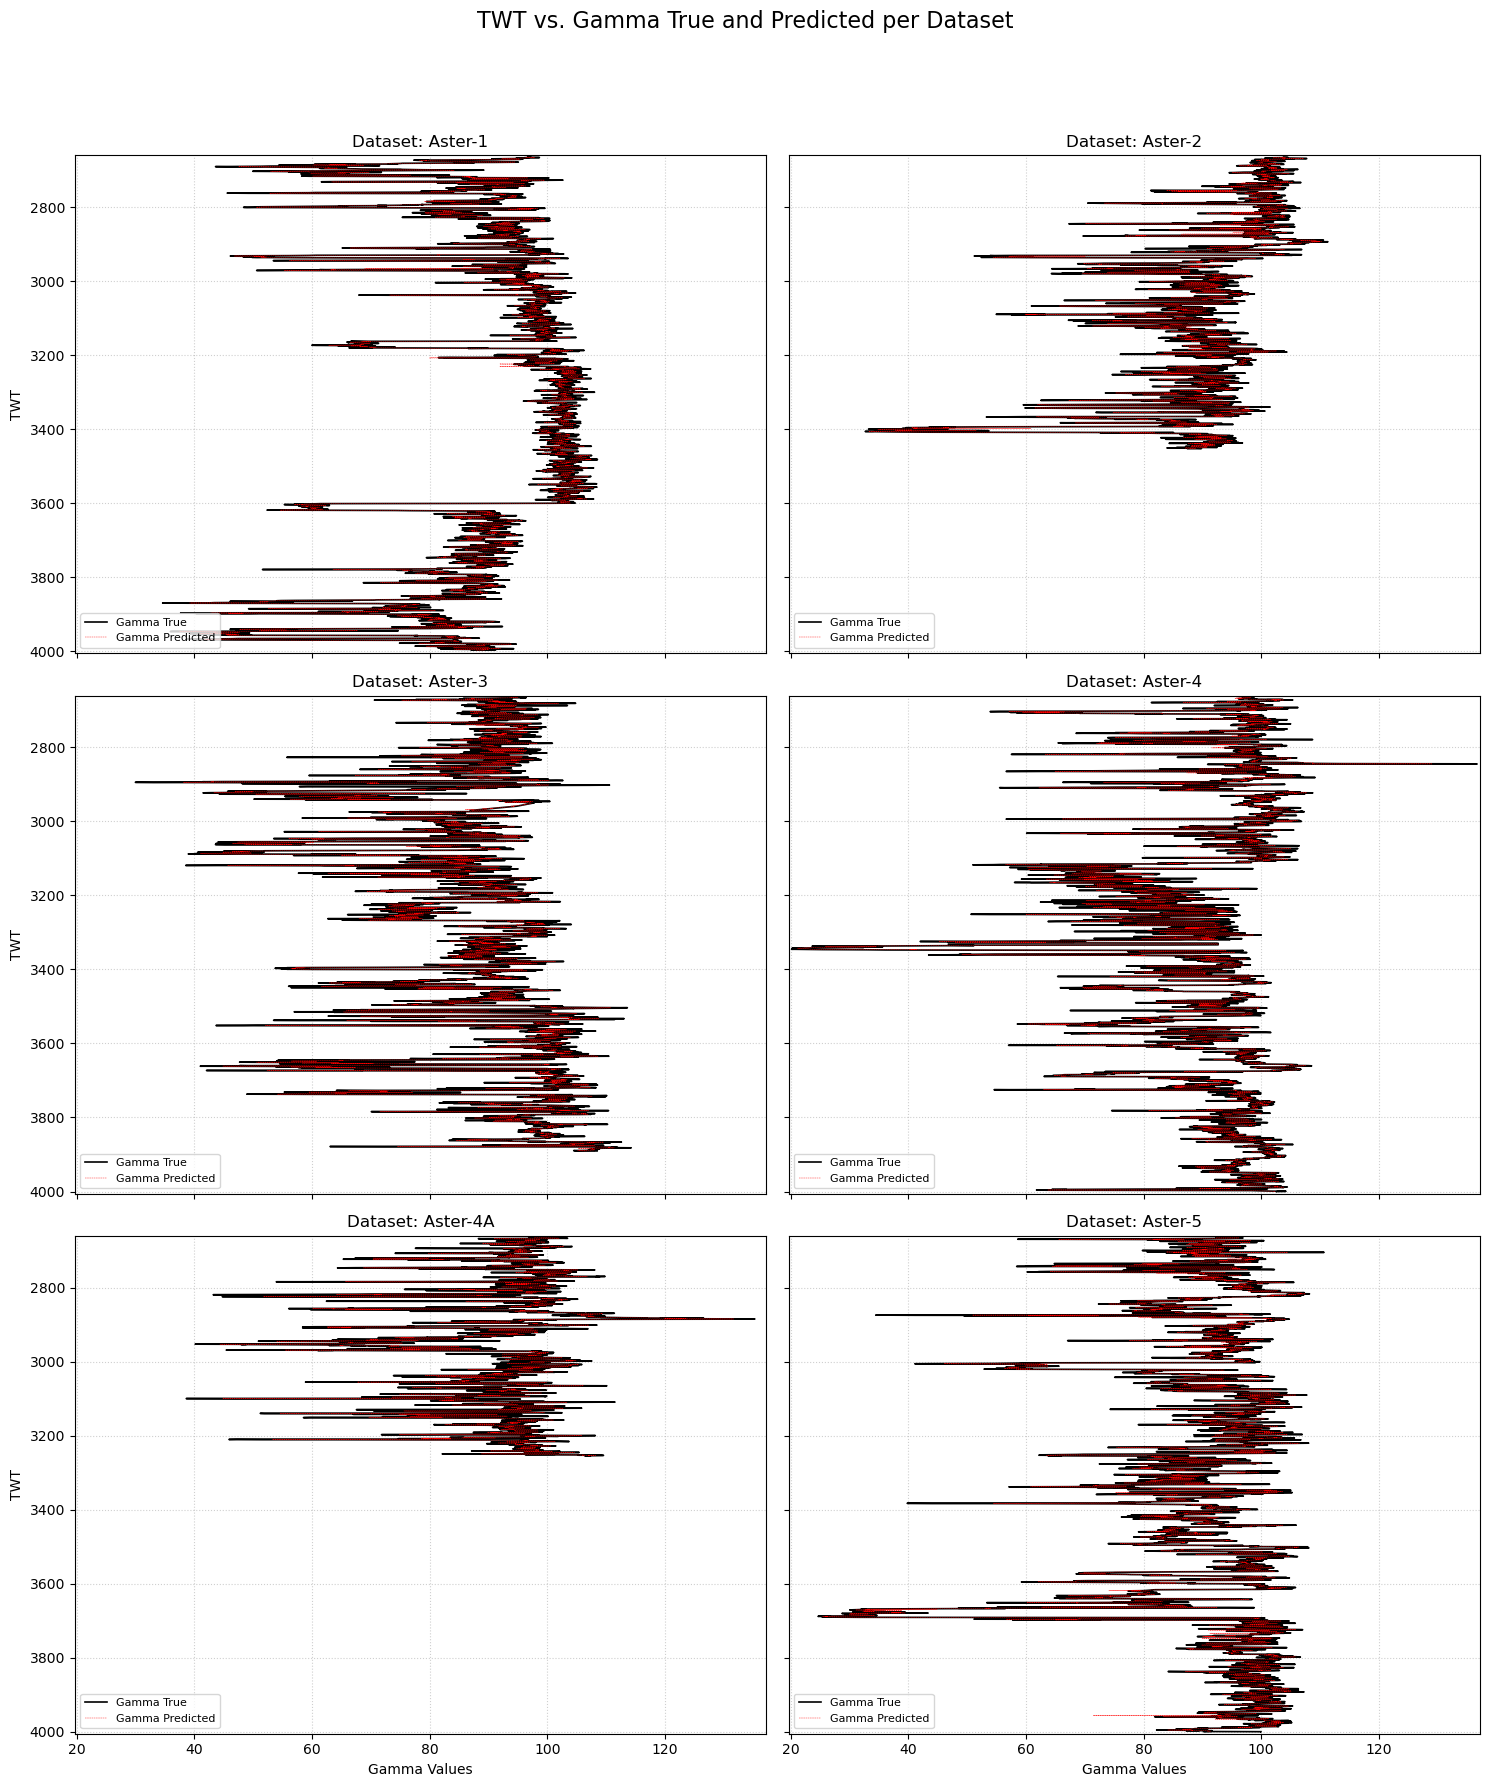

In [57]:
unique_name =  combined_predictions['Dataset_Name'].unique()
#unique_name
num_datasets = len(unique_name)

n_cols = 2
n_rows = (len(unique_name) + n_cols - 1) // n_cols

# Create a figure and a set of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 6 * n_rows), sharex=True, sharey=True)

# Flatten the axes array for easy iteration if it's 2D
axes = axes.flatten()

# Determine overall min/max for Gamma values to set shared x-axis limits
gamma_min = min(combined_predictions['Gamma_True'].min(),combined_predictions['Gamma_Predicted'].min())
gamma_max = max(combined_predictions['Gamma_True'].max(),combined_predictions['Gamma_Predicted'].max())

# Determine overall min/max for TWT to set shared y-axis limits
twt_min = combined_predictions['TWT'].min()
twt_max = combined_predictions['TWT'].max()

for i, dataset_name in enumerate(unique_name):
    ax = axes[i]
    subset_df = combined_predictions[combined_predictions['Dataset_Name'] == dataset_name]
    ax.plot(subset_df['Gamma_True'], subset_df['TWT'], color='black', label='Gamma True', linewidth=1.2)
    ax.plot(subset_df['Gamma_Predicted'], subset_df['TWT'], color='red', label='Gamma Predicted', linestyle='--', linewidth=0.3)

    # Set subplot title
    ax.set_title(f'Dataset: {dataset_name}', fontsize=12)

    # Set common X and Y limits
    ax.set_xlim(gamma_min - 0.5, gamma_max + 0.5) # Add a small buffer
    ax.set_ylim(twt_max + 5, twt_min - 5) # Invert Y-axis and add buffer

    # Invert y-axis (TWT)
    #ax.invert_yaxis()

    # Add labels to the first subplot or based on position for clarity
    if i % n_cols == 0: # Only left-most plots get Y-axis label
        ax.set_ylabel('TWT', fontsize=10)
    if i >= num_datasets - n_cols: # Only bottom plots get X-axis label
        ax.set_xlabel('Gamma Values', fontsize=10)

    # Add legend
    ax.legend(loc='lower left', fontsize=8)

    # Add grid
    ax.grid(True, linestyle=':', alpha=0.6)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Add a super title for the entire plot
fig.suptitle('TWT vs. Gamma True and Predicted per Dataset', fontsize=16, y=1.02) # Adjust y to move title up

plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Adjust layout to make room for suptitle
plt.show()



In [62]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Ensure the DataFrame is sorted by TWT for better visualization
# df_new is already available from previous steps

# Get unique Dataset_Names
unique_datasets = combined_predictions['Dataset_Name'].unique()
num_datasets = len(unique_datasets)

# Determine the number of rows and columns for subplots
n_cols = 2
n_rows = (num_datasets + n_cols - 1) // n_cols

# Create a figure with subplots
fig = make_subplots(
    rows=n_rows,
    cols=n_cols,
    subplot_titles=[f'Dataset: {name}' for name in unique_datasets],
    shared_xaxes=True,
    shared_yaxes=True,
    vertical_spacing=0.08, # Adjust spacing between subplots
    horizontal_spacing=0.05
)

# Determine overall min/max for Gamma values to set shared x-axis limits
gamma_min = min(combined_predictions['Gamma_True'].min(), combined_predictions['Gamma_Predicted'].min())
gamma_max = max(combined_predictions['Gamma_True'].max(), combined_predictions['Gamma_Predicted'].max())

# Determine overall min/max for TWT to set shared y-axis limits
twt_min = combined_predictions['TWT'].min()
twt_max = combined_predictions['TWT'].max()

for i, dataset_name in enumerate(unique_datasets):
    row = (i // n_cols) + 1
    col = (i % n_cols) + 1
    subset_df = combined_predictions[combined_predictions['Dataset_Name'] == dataset_name]

    # Add Gamma_True trace
    fig.add_trace(
        go.Scatter(
            x=subset_df['Gamma_True'],
            y=subset_df['TWT'],
            mode='lines',
            name='Gamma True',
            line=dict(color='black', width=1.5),
            showlegend=True if i == 0 else False # Show legend only for the first subplot
        ),
        row=row, col=col
    )

    # Add Gamma_Predicted trace
    fig.add_trace(
        go.Scatter(
            x=subset_df['Gamma_Predicted'],
            y=subset_df['TWT'],
            mode='lines',
            name='Gamma Predicted',
            line=dict(color='red', width=0.8, dash='dash'),
            showlegend=True if i == 0 else False # Show legend only for the first subplot
        ),
        row=row, col=col
    )

# Update layout for common settings
fig.update_layout(
    title_text='TWT vs. Gamma True and Predicted per Dataset',
    title_x=0.5, # Center the title
    height=600 * n_rows, # Adjust height based on number of rows
    showlegend=True,
    legend=dict(x=1.02, y=1, xanchor='left', yanchor='top'), # Position legend outside plots
    hovermode='x unified' # Enable hover for better interaction
)

# Update x-axis and y-axis properties for all subplots
fig.update_xaxes(
    title_text='Gamma Values',
    range=[0, 150], # Set fixed range from 0 to 150
    tickvals=[0, 50, 100, 150], # Set ticks at steps of 50
    gridcolor='lightgray',
    showgrid=True
)
fig.update_yaxes(
    title_text='TWT',
    autorange='reversed', # Invert y-axis
    range=[twt_max + 5, twt_min - 5], # Set explicit range with buffer for inverted axis
    gridcolor='lightgray',
    showgrid=True
)

# Display the plot
fig.show()